In [1]:
import pandas as pd

# ✅ Load your dataset
file_path = r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv"
df = pd.read_csv(file_path)

# Check first few rows (optional)
print(df.head())


   Gender  Age Parent_Education_Level  Study_Time  Failures  Absences  \
0    Male   19                    NaN           4         1        17   
1  Female   19                 Master          13         2         9   
2    Male   15               Bachelor           6         0         3   
3    Male   17                Primary           9         0        11   
4    Male   16                    NaN          13         0         7   

  Tutoring Test_Preparation_Course  Previous_Score  Motivation_Level  \
0       No                     Yes              42                 6   
1       No                      No              30                 2   
2      Yes                      No              63                 6   
3      Yes                      No              77                 7   
4       No                      No              77                 5   

   Stress_Level  Final_Grade Result  
0             5         17.8   FAIL  
1             2         16.4   FAIL  
2             

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)


Shape of dataset: (500, 13)

Column names:
 ['Gender', 'Age', 'Parent_Education_Level', 'Study_Time', 'Failures', 'Absences', 'Tutoring', 'Test_Preparation_Course', 'Previous_Score', 'Motivation_Level', 'Stress_Level', 'Final_Grade', 'Result']

Data types:
 Gender                      object
Age                          int64
Parent_Education_Level      object
Study_Time                   int64
Failures                     int64
Absences                     int64
Tutoring                    object
Test_Preparation_Course     object
Previous_Score               int64
Motivation_Level             int64
Stress_Level                 int64
Final_Grade                float64
Result                      object
dtype: object


In [5]:
print("Missing Values:\n")
print(df.isnull().sum())


Missing Values:

Gender                       0
Age                          0
Parent_Education_Level     108
Study_Time                   0
Failures                     0
Absences                     0
Tutoring                     0
Test_Preparation_Course      0
Previous_Score               0
Motivation_Level             0
Stress_Level                 0
Final_Grade                  0
Result                       0
dtype: int64


In [13]:
df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0], inplace=True)
print("Missing values handled — filled with mode value.\n")
print(df['Parent_Education_Level'].isnull().sum())


Missing values handled — filled with mode value.

0


In [15]:
df = df.dropna(subset=['Parent_Education_Level'])
print("Rows with missing Parent_Education_Level removed.\n")
print("Remaining rows:", df.shape[0])


Rows with missing Parent_Education_Level removed.

Remaining rows: 500


In [17]:
print("Statistical Summary:\n")
print(df.describe(include='all'))


Statistical Summary:

        Gender         Age Parent_Education_Level  Study_Time    Failures  \
count      500  500.000000                    500  500.000000  500.000000   
unique       2         NaN                      4         NaN         NaN   
top     Female         NaN              Secondary         NaN         NaN   
freq       256         NaN                    213         NaN         NaN   
mean       NaN   17.022000                    NaN    7.862000    0.546000   
std        NaN    1.452493                    NaN    4.163848    0.825377   
min        NaN   15.000000                    NaN    1.000000    0.000000   
25%        NaN   16.000000                    NaN    4.000000    0.000000   
50%        NaN   17.000000                    NaN    8.000000    0.000000   
75%        NaN   18.000000                    NaN   12.000000    1.000000   
max        NaN   19.000000                    NaN   14.000000    3.000000   

          Absences Tutoring Test_Preparation_Course  

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


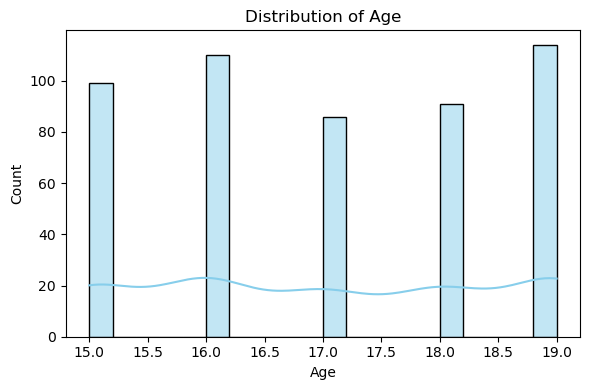

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


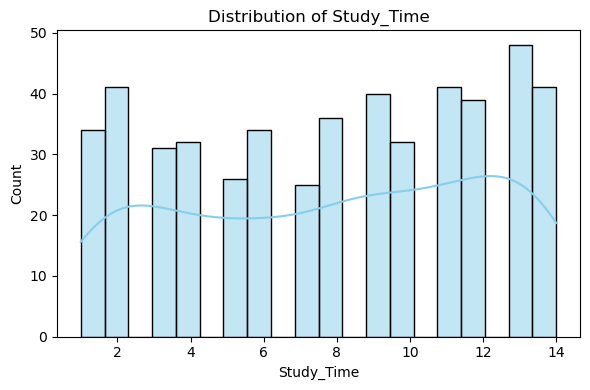

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


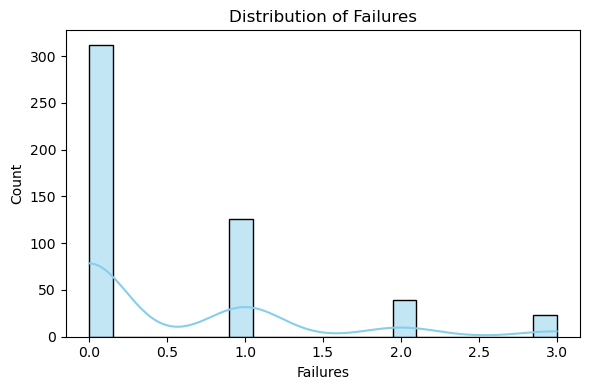

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


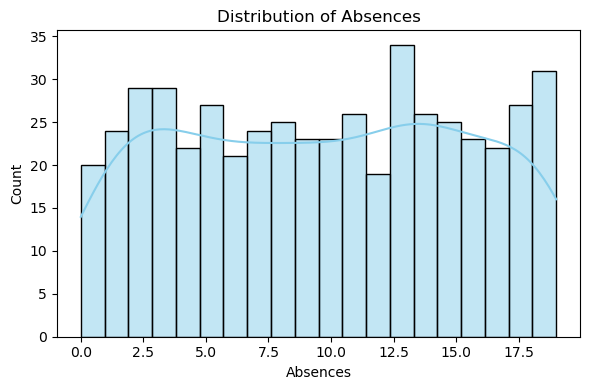

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


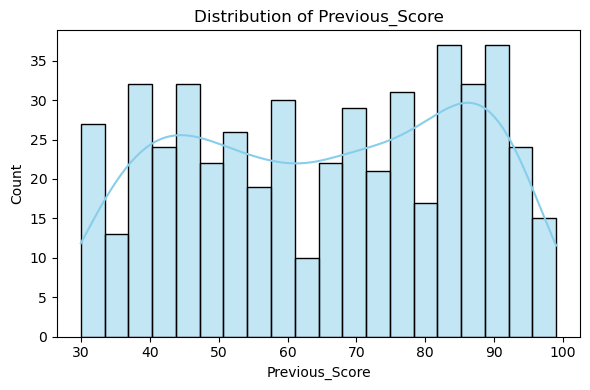

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


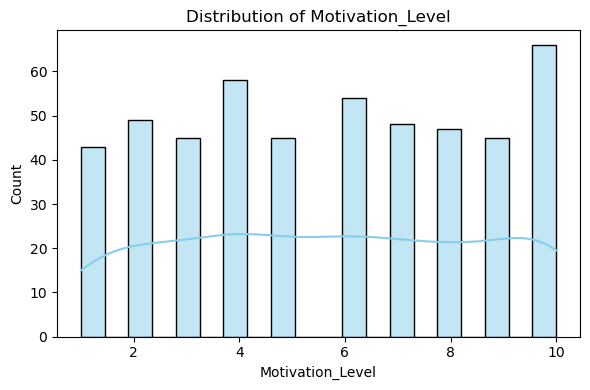

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


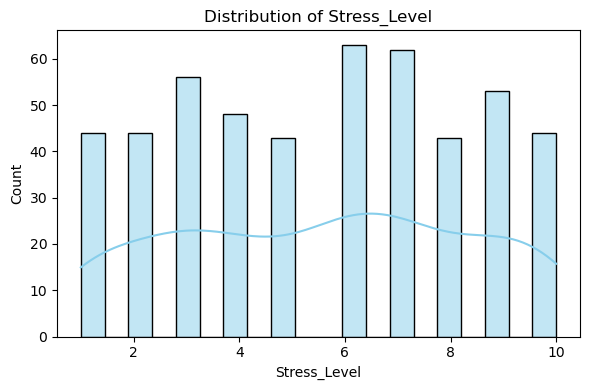

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


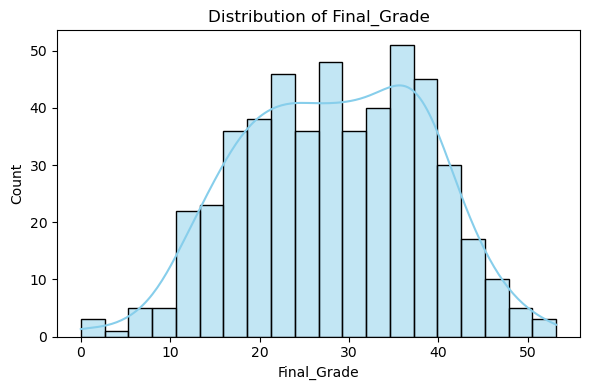

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


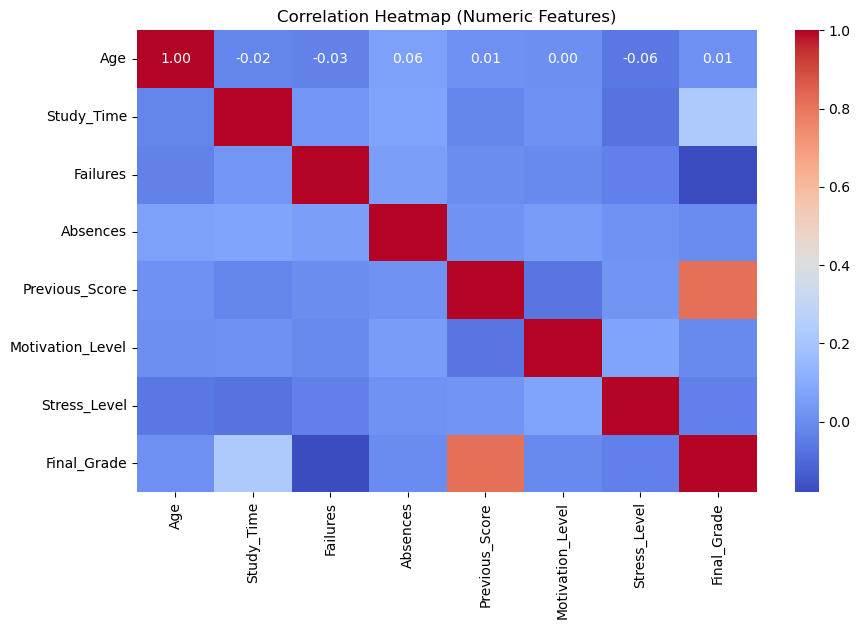

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


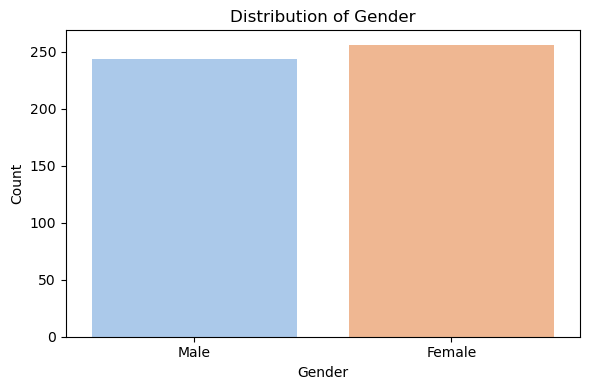

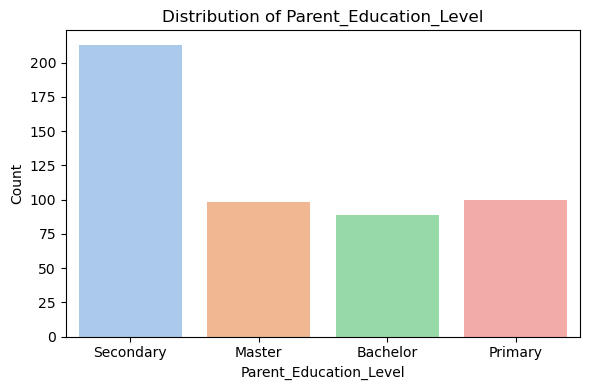

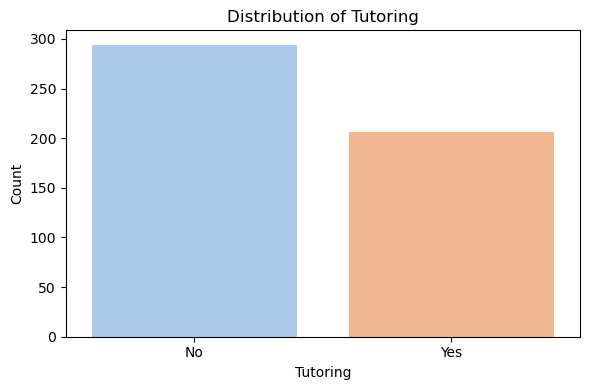

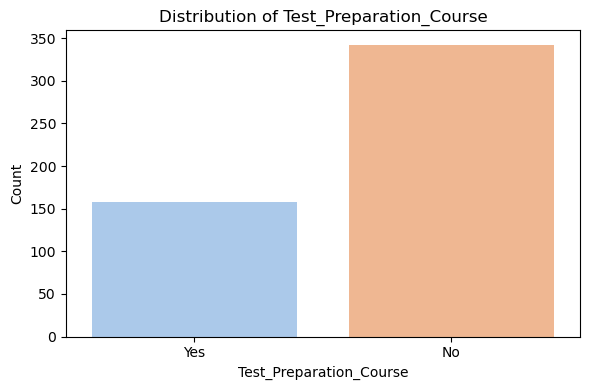

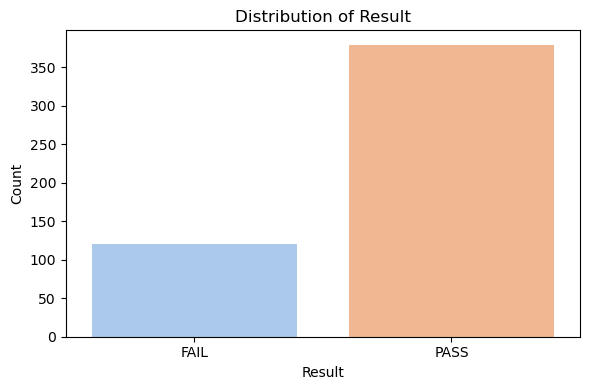

In [25]:
categorical_cols = df.select_dtypes(exclude=['number']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Separate features & targets
X = df.drop(['Result', 'Final_Grade'], axis=1)
y_class = df['Result']
y_reg = df['Final_Grade']

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

clf_pipeline.fit(X_train, y_train)
y_pred_class = clf_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_class))


Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

        FAIL       0.67      0.58      0.62        24
        PASS       0.87      0.91      0.89        76

    accuracy                           0.83       100
   macro avg       0.77      0.75      0.76       100
weighted avg       0.82      0.83      0.83       100


Confusion Matrix:
 [[14 10]
 [ 7 69]]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

reg_pipeline.fit(X_train, y_train)
y_pred_reg = reg_pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))


MSE: 32.093047240000004
R² Score: 0.6475816957147336


In [40]:
pip install --upgrade scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [49]:
# ---------------------------------------------------
# 📘 Import Libraries
# ---------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# ---------------------------------------------------
# 📥 Load Dataset
# ---------------------------------------------------
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# ---------------------------------------------------
# 🧹 Handle Missing Values
# ---------------------------------------------------
df = df.dropna(subset=["Parent_Education_Level"])

# ---------------------------------------------------
# 🎯 Define Features (X) and Target (y)
# ---------------------------------------------------
X = df.drop(columns=['Result'])
y = df['Result']

# ---------------------------------------------------
# 🔢 Split Data
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------
# 🔠 Encode Target Variable (PASS/FAIL → 1/0)
# ---------------------------------------------------
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# ---------------------------------------------------
# ⚙️ Preprocessing (Numeric + Categorical)
# ---------------------------------------------------
numeric_features = ['Age', 'Study_Time', 'Failures', 'Absences', 'Previous_Score', 'Motivation_Level', 'Stress_Level', 'Final_Grade']
categorical_features = ['Gender', 'Parent_Education_Level', 'Tutoring', 'Test_Preparation_Course']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ---------------------------------------------------
# 🤖 Define Models
# ---------------------------------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


# ---------------------------------------------------
# 🧠 Train and Evaluate All Models
# ---------------------------------------------------
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n-----------------------------")
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# ---------------------------------------------------
# 🏁 Compare All Accuracies
# ---------------------------------------------------
print("\n✅ Model Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.2f}")



-----------------------------
Model: Logistic Regression
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.94      0.97      0.95        62

    accuracy                           0.92        79
   macro avg       0.90      0.87      0.88        79
weighted avg       0.92      0.92      0.92        79

Confusion Matrix:
[[13  4]
 [ 2 60]]

-----------------------------
Model: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        62

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

Confusion Matrix:
[[17  0]
 [ 0 62]]

-----------------------------
Model: Decision Tree
Accuracy: 1.00
Classification Repo

In [45]:
pip install --upgrade xgboost scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [57]:
X_train.dtypes


Gender                      object
Age                          int64
Parent_Education_Level      object
Study_Time                   int64
Failures                     int64
Absences                     int64
Tutoring                    object
Test_Preparation_Course     object
Previous_Score               int64
Motivation_Level             int64
Stress_Level                 int64
Final_Grade                float64
dtype: object

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Detect categorical & numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# ✅ Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# ✅ Pipeline
rf = RandomForestClassifier(random_state=42)
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf)
])

# ✅ Parameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__criterion': ['gini', 'entropy']
}

# ✅ Grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# ✅ Best model
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        76

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
 [[24  0]
 [ 0 76]]


In [16]:
print("🚀 Starting Random Forest Grid Search...")

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("✅ Grid Search Completed Successfully!\n")

# ✅ Results
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)

print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🚀 Starting Random Forest Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Grid Search Completed Successfully!

Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}

🎯 Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        76

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


🧩 Confusion Matrix:
 [[24  0]
 [ 0 76]]


✅ Data Loaded Successfully
   Gender  Age Parent_Education_Level  Study_Time  Failures  Absences  \
0    Male   19                    NaN           4         1        17   
1  Female   19                 Master          13         2         9   
2    Male   15               Bachelor           6         0         3   
3    Male   17                Primary           9         0        11   
4    Male   16                    NaN          13         0         7   

  Tutoring Test_Preparation_Course  Previous_Score  Motivation_Level  \
0       No                     Yes              42                 6   
1       No                      No              30                 2   
2      Yes                      No              63                 6   
3      Yes                      No              77                 7   
4       No                      No              77                 5   

   Stress_Level  Final_Grade Result  
0             5         17.8   FAIL  
1             2         1

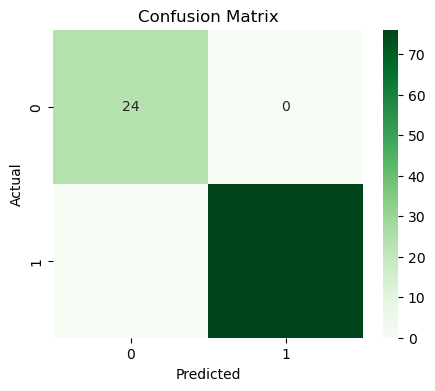


✅ Model Saved as 'final_classification_model.pkl'


In [11]:
# ---------------------------------------------------------
# 🎯 Student Performance Classification Model (Final - Fixed)
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ---------------------------------------------------------
# 1️⃣ Load Dataset
# ---------------------------------------------------------
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")  # <-- replace with your file name
print("✅ Data Loaded Successfully")
print(df.head())

# ---------------------------------------------------------
# 2️⃣ Encode Categorical Columns
# ---------------------------------------------------------
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\n✅ Categorical Columns Encoded")

# ---------------------------------------------------------
# 3️⃣ Split Data (Target = 'Result')
# ---------------------------------------------------------
target_col = 'Result'   # ✅ updated target column
X = df.drop([target_col], axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 4️⃣ Train Model
# ---------------------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("\n✅ Model Training Completed")

# ---------------------------------------------------------
# 5️⃣ Evaluate Model
# ---------------------------------------------------------
y_pred = rf.predict(X_test)

print("\n🎯 Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# ---------------------------------------------------------
# 6️⃣ Visualize Confusion Matrix
# ---------------------------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------------
# 7️⃣ Save Model using Pickle
# ---------------------------------------------------------
with open("final_classification_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("\n✅ Model Saved as 'final_classification_model.pkl'")


In [23]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# retrain using your dataset
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# save it again
with open("final_classification_model.pkl", "wb") as f:
    pickle.dump(rf, f)


In [25]:
import sklearn
print("Training sklearn version:", sklearn.__version__)


Training sklearn version: 1.7.2


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

# ----------------------------
# Load and prepare data
# ----------------------------
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Separate features & target
X = df.drop('Result', axis=1)
y = df['Result']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model with sklearn 1.7.2
with open('final_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model retrained and saved successfully using scikit-learn 1.7.2!")


✅ Model retrained and saved successfully using scikit-learn 1.7.2!


In [31]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.7.2


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
import sklearn

print("✅ Training with scikit-learn version:", sklearn.__version__)

# Load dataset
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save pickle
with open('final_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("🎯 Model retrained & saved successfully with sklearn", sklearn.__version__)


✅ Training with scikit-learn version: 1.7.2
🎯 Model retrained & saved successfully with sklearn 1.7.2


In [41]:
import joblib
joblib.dump(rf, "final_classification_model.joblib")
print("✅ Model saved as 'final_classification_model.joblib'")


✅ Model saved as 'final_classification_model.joblib'


In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# 1️⃣ Load dataset
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# 2️⃣ Identify target column
target_col = "Result"

# 3️⃣ Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # save encoders for later use if needed

# 4️⃣ Split features & target
X = df.drop(target_col, axis=1)
y = df[target_col]

# 5️⃣ Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# 6️⃣ Save model and encoders in SAME environment
joblib.dump(rf, "final_classification_model.joblib")
joblib.dump(label_encoders, "label_encoders.joblib")

print("✅ Model and encoders saved successfully in same environment!")
print("🎯 You can now safely use this model in Streamlit.")


✅ Model and encoders saved successfully in same environment!
🎯 You can now safely use this model in Streamlit.


In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# 1️⃣ Load dataset
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# 2️⃣ Handle all categorical values properly
encoding = {
    'Gender': {'Male': 0, 'Female': 1},
    'Parent_Education_Level': {
        'Primary': 0,
        'Secondary': 1,
        'High School': 2,
        'Bachelor': 3,
        'Master': 4,
        'PhD': 5
    },
    'Tutoring': {'Yes': 1, 'No': 0},
    'Test_Preparation_Course': {'Yes': 1, 'No': 0}
}

df.replace(encoding, inplace=True)

# 3️⃣ Split data
X = df.drop("Result", axis=1)
y = df["Result"]

# 4️⃣ Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# 5️⃣ Save encoded model
joblib.dump(rf, "final_classification_model.joblib")
print("✅ Model retrained successfully with full categorical encoding!")


✅ Model retrained successfully with full categorical encoding!


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# Encode categorical columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Parent_Education_Level'] = df['Parent_Education_Level'].map({
    'Primary': 0, 'Secondary': 1, 'High School': 2,
    'Bachelor': 3, 'Master': 4, 'PhD': 5
})
df['Tutoring'] = df['Tutoring'].map({'Yes': 1, 'No': 0})
df['Test_Preparation_Course'] = df['Test_Preparation_Course'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop(columns=['Result'])  # column name for output must be "Result" or similar
y = df['Result']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "final_classification_model.joblib")
print("✅ Model retrained and saved successfully with scikit-learn 1.7.2")


✅ Model retrained and saved successfully with scikit-learn 1.7.2


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")

# Auto-detect categorical columns and encode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Separate features and target
target_col = "Result"  # replace if your target column name differs
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "final_classification_model.joblib")
print("✅ Model retrained and saved successfully with scikit-learn 1.7.2")


✅ Model retrained and saved successfully with scikit-learn 1.7.2


In [65]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, r"C:\Users\sande\OneDrive\Desktop\New folder\final_classification_model.joblib")


['C:\\Users\\sande\\OneDrive\\Desktop\\New folder\\final_classification_model.joblib']

In [67]:
# ============================================
# 🎯 Logistic Regression Classifier (Full Code)
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# ---------------------------------------------------
# 1️⃣ Load your dataset
# ---------------------------------------------------
df = pd.read_csv(r"C:\Users\sande\Downloads\Student_Performance_Prediction_Project.csv")  # 🔹 replace with your file name
print("Shape of dataset:", df.shape)
print(df.head())

# ---------------------------------------------------
# 2️⃣ Encode categorical columns (if any)
# ---------------------------------------------------
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ---------------------------------------------------
# 3️⃣ Split dataset
# ---------------------------------------------------
X = df.drop("Result", axis=1)   # 🔹 Replace with your target column
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------
# 4️⃣ Feature scaling
# ---------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------
# 5️⃣ Train Logistic Regression model
# ---------------------------------------------------
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# ---------------------------------------------------
# 6️⃣ Evaluate performance
# ---------------------------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Model Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------------------------------
# 7️⃣ Save model and scaler
# ---------------------------------------------------
joblib.dump(model, "logistic_model.joblib")
joblib.dump(scaler, "scaler.joblib")

print("\n🎉 Model and scaler saved successfully!")


Shape of dataset: (500, 13)
   Gender  Age Parent_Education_Level  Study_Time  Failures  Absences  \
0    Male   19                    NaN           4         1        17   
1  Female   19                 Master          13         2         9   
2    Male   15               Bachelor           6         0         3   
3    Male   17                Primary           9         0        11   
4    Male   16                    NaN          13         0         7   

  Tutoring Test_Preparation_Course  Previous_Score  Motivation_Level  \
0       No                     Yes              42                 6   
1       No                      No              30                 2   
2      Yes                      No              63                 6   
3      Yes                      No              77                 7   
4       No                      No              77                 5   

   Stress_Level  Final_Grade Result  
0             5         17.8   FAIL  
1             2         

In [74]:
import joblib

# Re-save in compatible format
joblib.dump(model, "final_classification_model_v2.pkl", protocol=4)
joblib.dump(scaler, "scaler_v2.pkl", protocol=4)


['scaler_v2.pkl']